In [51]:
import pandas as pd
import datetime
import time
import networkx as nx
import matplotlib.pyplot as plt
from collections import OrderedDict, Counter
import requests
#import nxviz as nv

In [2]:
df = pd.read_csv('/Users/armitasafavi/downloads/soc-sign-bitcoinotc.csv',names=['SOURCE', 'TARGET', 'RATING', 'TIME'])

In [3]:
df.head(10)

,SOURCE,TARGET,RATING,TIME
0,6,2,4,1.289242e+09
1,6,5,2,1.289242e+09
2,1,15,1,1.289243e+09
3,4,3,7,1.289245e+09
4,13,16,8,1.289254e+09
5,13,10,8,1.289254e+09
6,7,5,1,1.289363e+09
7,2,21,5,1.289371e+09
8,2,20,5,1.289371e+09
9,21,2,5,1.289381e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35592 entries, 0 to 35591
Data columns (total 4 columns):
SOURCE    35592 non-null int64
TARGET    35592 non-null int64
RATING    35592 non-null int64
TIME      35592 non-null float64
dtypes: float64(1), int64(3)
memory usage: 1.1 MB


In [5]:
df['TIME'] = [datetime.fromtimestamp(time, timezone.utc).strftime('%Y-%m-%d %H:%M:%S') for time in df['TIME']]

AttributeError: module 'datetime' has no attribute 'fromtimestamp'

In [6]:
df.head()

,SOURCE,TARGET,RATING,TIME
0,6,2,4,1.289242e+09
1,6,5,2,1.289242e+09
2,1,15,1,1.289243e+09
3,4,3,7,1.289245e+09
4,13,16,8,1.289254e+09


In [48]:
url = 'https://bitcoin-otc.com/viewratings.php'
html = requests.get(url).content
df_list = pd.read_html(html, header=[0])
meta = df_list[-1]
meta.to_csv('my data.csv')

In [49]:
id_data = pd.read_csv('my data.csv')
id_data = id_data.drop(columns=['Unnamed: 0'])

In [50]:
id_data.head()

,id,nick,first rated(UTC),keyid,total rating,number of positive ratings received,number of negative ratings received,number of positive ratings sent,number of negative ratings sent
0,1,nanotube,2010-11-08 18:14:09,43CB529A9ADA9573,801.0,226,0,206,9
1,2,jgarzik,2010-11-08 18:35:30,DA1DC20F2DBF0CA8,95.0,39,3,43,2
2,3,mtgox,2010-11-08 18:35:39,NaN,-16.0,12,10,0,0
3,4,OneFixt,2010-11-08 18:36:00,C70BCA4D5EFEFF31,168.0,54,0,60,3
4,5,XxMalouinxX,2010-11-08 18:36:11,NaN,7.0,3,0,4,0


In [67]:
ne_rating=id_data.sort_values(by='number of negative ratings received', ascending=False)

In [68]:
ne_rating.head()

,id,nick,first rated(UTC),keyid,total rating,number of positive ratings received,number of negative ratings received,number of positive ratings sent,number of negative ratings sent
3675,3744,Supa,2013-03-24 18:51:52,CBB55134DAA076A9,-675.0,6,75,20,12
1985,2028,aethero,2012-05-02 23:24:52,34DF1DBEF11759B0,192.0,234,46,267,26
1344,1383,pirateat40,2011-08-01 21:18:45,614DB74CFA5B357E,-242.0,51,46,65,1
1768,1810,GlooBoy,2012-02-20 04:37:05,A23D510BD6E310D3,252.0,278,41,253,161
866,905,rg,2011-06-05 17:39:49,0089196E17BF8D89,159.0,228,40,225,41


In [74]:
id_data['rating'] = (id_data['total rating'])/ (id_data['number of negative ratings received'] + id_data['number of positive ratings received'])

    
    

In [75]:
id_data.head()

,id,nick,first rated(UTC),keyid,total rating,number of positive ratings received,number of negative ratings received,number of positive ratings sent,number of negative ratings sent,rating
0,1,nanotube,2010-11-08 18:14:09,43CB529A9ADA9573,801.0,226,0,206,9,3.544248
1,2,jgarzik,2010-11-08 18:35:30,DA1DC20F2DBF0CA8,95.0,39,3,43,2,2.261905
2,3,mtgox,2010-11-08 18:35:39,NaN,-16.0,12,10,0,0,-0.727273
3,4,OneFixt,2010-11-08 18:36:00,C70BCA4D5EFEFF31,168.0,54,0,60,3,3.111111
4,5,XxMalouinxX,2010-11-08 18:36:11,NaN,7.0,3,0,4,0,2.333333


In [7]:
G = nx.Graph()

In [8]:
TUPLES = list(zip(df['SOURCE'],df['TARGET']))

In [9]:
len(TUPLES)

35592

In [10]:
nodes = []
for i, j in enumerate(df['SOURCE']):
    if df['SOURCE'][i] not in nodes:
        nodes.append(df['SOURCE'][i])
    
G.add_nodes_from(nodes)

In [11]:
len(nodes)

4814

In [12]:
for index, row in df.iterrows():
    G.add_edge(df['SOURCE'][index],df['TARGET'][index], weight=df['RATING'][index])

In [53]:
deg_cent =nx.degree_centrality(G)
sorted_deg_cent = OrderedDict(sorted(deg_cent.items(), key=lambda v: v[1], reverse=True))
top_20_members=collections.Counter(sorted_deg_cent).most_common(20)
top_20_members

[(35, 0.13520408163265304),
 (1810, 0.07465986394557822),
 (2642, 0.07448979591836734),
 (2125, 0.07414965986394557),
 (2028, 0.055442176870748296),
 (905, 0.05442176870748299),
 (4172, 0.049829931972789114),
 (1, 0.044897959183673466),
 (7, 0.04064625850340136),
 (3129, 0.036904761904761905),
 (1018, 0.03673469387755102),
 (13, 0.036564625850340135),
 (2388, 0.03605442176870748),
 (4197, 0.03605442176870748),
 (2296, 0.03571428571428571),
 (1334, 0.03469387755102041),
 (2067, 0.033843537414965985),
 (1953, 0.033673469387755096),
 (1386, 0.03265306122448979),
 (3988, 0.03248299319727891)]

In [22]:
def nodes_with_nbrs(g):
    """
    Returns all nodes in graph G with the number of their neighbors.
    """
    nodes = {}
    
    # Iterate over all nodes in G
    for n in g.nodes():
    
        # Check if the number of neighbors of n matches m
        if n not in nodes:
            
            nodes[n] = len(list(g.neighbors(n)))

            
    # Return the nodes with m neighbors
    return nodes



In [54]:
G1 = nodes_with_nbrs(G)
Sorted_nodes = OrderedDict(sorted(G1.items(), key=lambda t: t[1], reverse=True))
Top_20_neighbors = Counter(Sorted_nodes).most_common(20)

In [55]:
#calculating nodes with the highest neighbors
Top_20_neighbors

[(35, 795),
 (1810, 439),
 (2642, 438),
 (2125, 436),
 (2028, 326),
 (905, 320),
 (4172, 293),
 (1, 264),
 (7, 239),
 (3129, 217),
 (1018, 216),
 (13, 215),
 (2388, 212),
 (4197, 212),
 (2296, 210),
 (1334, 204),
 (2067, 199),
 (1953, 198),
 (1386, 192),
 (3988, 191)]

In [20]:
# Compute the degree of every node: degrees
degrees = [len(list(G.neighbors(n))) for n in G.nodes()]


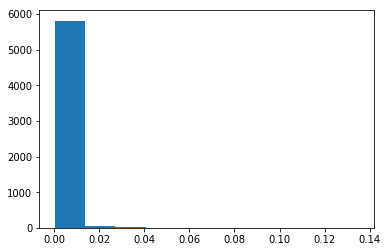

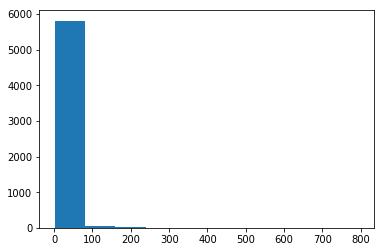

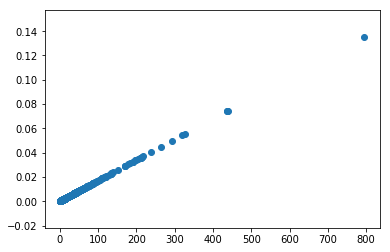

In [19]:


# Plot a histogram of the degree centrality distribution of the graph.
plt.figure()
plt.hist(list(deg_cent.values()))
plt.show()

# Plot a histogram of the degree distribution of the graph
plt.figure()
plt.hist(degrees)
plt.show()

# Plot a scatter plot of the centrality distribution and the degree distribution
plt.figure()
plt.scatter(x= degrees, y = list(deg_cent.values()) )
plt.show()

In [66]:

negative ={}
for index, row in df.iterrows():
    if df['RATING'][index]< 0:
        negative[df['TARGET'][index]] = df['RATING'][index]

In [65]:
negative

{1: -5,
 2: -1,
 4: -8,
 6: -10,
 7: -5,
 13: -10,
 17: -10,
 19: -10,
 26: -10,
 35: -10,
 39: -10,
 57: -1,
 64: -1,
 96: -10,
 100: -10,
 101: -10,
 104: -1,
 115: -10,
 132: -10,
 134: -10,
 135: -8,
 141: -10,
 149: -1,
 159: -1,
 171: -10,
 177: -1,
 184: -1,
 192: -1,
 200: -1,
 202: -2,
 204: -9,
 215: -10,
 238: -10,
 239: -1,
 241: -4,
 242: -10,
 270: -10,
 280: -3,
 304: -10,
 309: -10,
 312: -10,
 318: -10,
 322: -10,
 330: -10,
 342: -10,
 346: -10,
 353: -10,
 359: -1,
 361: -10,
 363: -10,
 366: -10,
 395: -10,
 397: -10,
 399: -6,
 405: -10,
 412: -10,
 415: -1,
 425: -10,
 427: -1,
 432: -10,
 443: -10,
 444: -1,
 446: -10,
 463: -3,
 468: -10,
 469: -10,
 476: -10,
 481: -2,
 484: -10,
 491: -10,
 492: -1,
 494: -10,
 507: -4,
 522: -10,
 537: -1,
 539: -10,
 540: -1,
 545: -1,
 546: -5,
 550: -10,
 566: -1,
 570: -4,
 606: -10,
 623: -10,
 630: -2,
 634: -10,
 644: -1,
 647: -1,
 650: -10,
 664: -1,
 687: -10,
 710: -10,
 718: -10,
 729: -10,
 732: -10,
 770: -10,
 